# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Andhika Rafi Lazuardi]
- **Email:** [andhikarafilazuardi@gmail.com]
- **ID Dicoding:** [dhikarfi]


## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara cuaca dengan banyaknya rent
- Bagaimana Trend Penyewaan sepeda setiap harinya

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

##Gathering Data

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/bike-sharing/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/bike-sharing/hour.csv')

##Assesing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi data Hour: ", hour_df.duplicated().sum())

Jumlah duplikasi data Hour:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [ ]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())

Jumlah duplikasi data day:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##Cleaning Data

In [ ]:
#Data sudah aman, tidak ada missing value, duplicate, outlier, maupun ununderstand value

#Exploratory Data Analysis (EDA)

##Melihat korelasi antara cuaca dengan banyaknya rent

In [ ]:
rent_weather_df = pd.DataFrame(day_df)
rent_weather_cor_df = rent_weather_df[['weathersit', 'cnt']]
rent_weather_cor_df

,weathersit,cnt
0,2,985
1,2,801
2,1,1349
3,1,1562
4,1,1600
...,...,...
726,2,2114
727,2,3095
728,2,1341
729,1,1796


In [ ]:
heavy_rain_cnt = rent_weather_cor_df['weathersit'] == 4
heavy_rain_cnt.sum()

0

In [ ]:
def map_weather(x):
    if x == 1:
        return "1"
    elif x == 2:
        return "2"
    elif x == 3:
        return "3"
    elif x == 4:
        return "4"
rent_weather_cor_df['weather'] = rent_weather_cor_df.weathersit.apply(map_weather)
result = rent_weather_cor_df.groupby(by="weather").cnt.nunique().sort_values(ascending=False)
print(result)

weather
1    451
2    243
3     21
Name: cnt, dtype: int64


<ipython-input-37-32d7b4aa816a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_weather_cor_df['weather'] = rent_weather_cor_df.weathersit.apply(map_weather)


In [ ]:
rent_weather_cor_df.groupby(by=["weather"]).agg({
    "cnt": "sum",
})

,cnt
weather,
1,2257952
2,996858
3,37869


##Pembandingan antara Peminjaman Casual dan Registered


In [ ]:
casual_register_season_df = pd.DataFrame(day_df)
casual_register_season_cor_df = casual_register_season_df[['dteday','weekday', 'workingday', 'casual', 'registered']]
casual_register_season_cor_df

,dteday,weekday,workingday,casual,registered
0,2011-01-01,6,0,331,654
1,2011-01-02,0,0,131,670
2,2011-01-03,1,1,120,1229
3,2011-01-04,2,1,108,1454
4,2011-01-05,3,1,82,1518
...,...,...,...,...,...
726,2012-12-27,4,1,247,1867
727,2012-12-28,5,1,644,2451
728,2012-12-29,6,0,159,1182
729,2012-12-30,0,0,364,1432


In [ ]:
def map_weather(x):
    if x == 1:
        return "Monday"
    elif x == 2:
        return "Tuesday"
    elif x == 3:
        return "Wednesday"
    elif x == 4:
        return "Thursday"
    elif x == 5:
        return "Firday"
    elif x == 6:
        return "Saturday"
    elif x == 0:
        return "Sunday"
casual_register_season_df['day'] = casual_register_season_df.weekday.apply(map_weather)
result = casual_register_season_df.groupby(by="day").cnt.nunique().sort_values(ascending=False)
print(result)

day
Firday       104
Monday       104
Sunday       104
Tuesday      104
Thursday     103
Wednesday    103
Saturday     102
Name: cnt, dtype: int64


In [ ]:
casual_register_season_df['count'] = casual_register_season_df['casual'] + casual_register_season_df['registered']

casual_register_season_df.groupby(by=["day"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
day,,,
Firday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


#Visualization & Exploratory Analysis

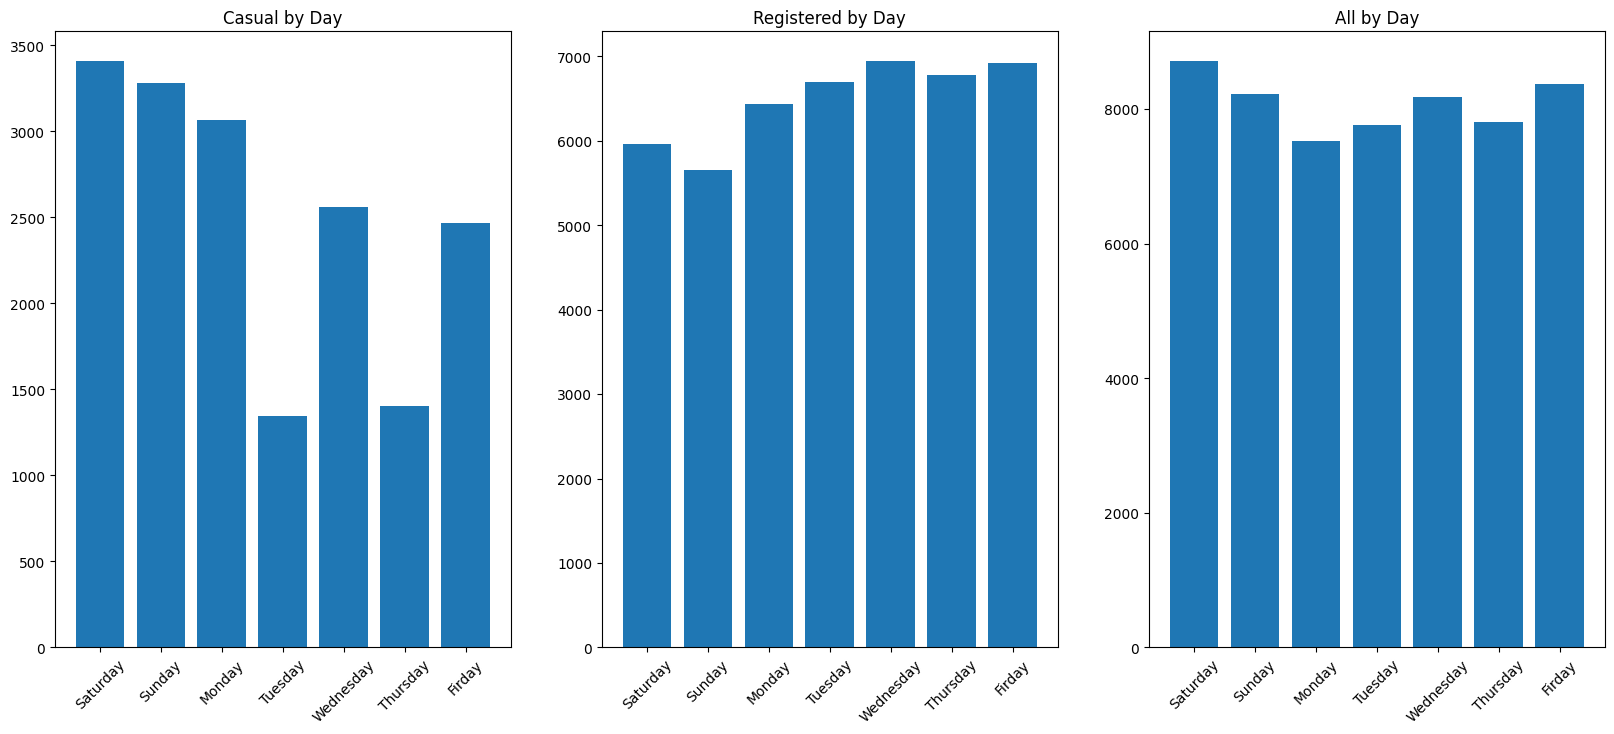

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20,8), squeeze =False)
day = casual_register_season_df['day']
casual = casual_register_season_df['casual']
registered = casual_register_season_df['registered']
count = casual_register_season_df['count']

ax[0,0].set_title('Casual by Day')
ax[0,0].bar(x=day, height=casual)
ax[0,0].tick_params(axis='x', rotation=45)

ax[0,1].set_title('Registered by Day')
ax[0,1].bar(x=day, height=registered)
ax[0,1].tick_params(axis='x', rotation=45)

ax[0,2].set_title('All by Day')
ax[0,2].bar(x=day, height=count)
ax[0,2].tick_params(axis='x', rotation=45)

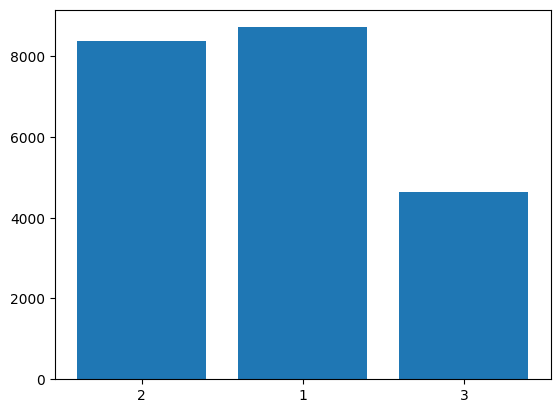

In [ ]:
weather = rent_weather_cor_df['weather']
rent = rent_weather_cor_df['cnt']

plt.bar(x=weather, height=rent)
plt.show()
#dont forget to add 'expand' on the dashboard

#Conclusion

Dari Visualisasi yang sudah dibuat, dapat dilihat bahwa:

1. Cuaca sangat mempengaruhi user untuk menyewa sepeda, dikarenakan user sangat mempertimbangkan cuaca pada saat itu agar mereka nyaman dan aman dalam menyewa/memakai sepeda.
2. Dari data 'Casual' dan juga 'Registered', dapat dilihat bahwa pengguna casual (non member) paling banyak menyewa sepeda pada hari sabtu dan minggu. Hal itu dikarenakan, hari-hari tersebut merupakan hari libur dan banyak orang yang mencoba menyewa sepeda. Sedangkan, untuk user 'Registered' (member), mereka kebanyakan dari kalangan yang bekerja atau mungkin bersekolah (memiliki kegiatan di hari kerja).